In [8]:
import os
os.chdir('C:\\Users\\Pallavi_P\\Desktop\\WD_Python')

In [9]:
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 

In [10]:
df = pd.read_csv('h1n1_vaccine_prediction.csv') #26707; 34 , 1st is unique id 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [11]:
# lets drop 1st unique_id 
df33 = df.drop(['unique_id'], axis = 1)
df33.info() # now 33 columns
# droping all will give 11794 rows only 50% values 
dfnomissing = df33.dropna()
dfnomissing.info() # # 11,794 rows; 33 columns
# its not a good idea to carry with 11,794 rows
## note that index identification remains same as in 
# the original file 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [12]:
#so, we will remove the column- "has_health_insur" (14433 rows only)
#and create a new file name 'df32'. This is shown below. 
df32 = df33.drop(['has_health_insur'], axis = 1)


In [13]:
df32.info() # observe many missing values in many columns, now 32 columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [14]:
# lets remove all missing values from df32
df_vac = df32.dropna() # 19642 , 32 
df_vac.info()
## now , 19642 is a good no to go with! 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [15]:
###__________________1 ALWAYS START WITH TARGET VARIABLE
# 1 h1n1_vaccine - Target Variable
df_vac.h1n1_vaccine.isnull().sum() #No Missing values
df_vac.h1n1_vaccine.value_counts() 

0    15128
1     4514
Name: h1n1_vaccine, dtype: int64

Text(0.5, 1.0, 'Barplot of h1n1_vaccine')

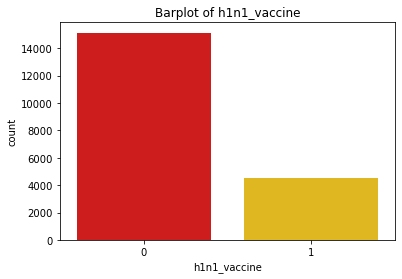

In [16]:
# Bar Plot
sns.countplot(x = 'h1n1_vaccine', data = df_vac , palette = 'hot')
plt.title('Barplot of h1n1_vaccine')

Text(0.5, 1.0, 'Histogram of h1n1_worry')

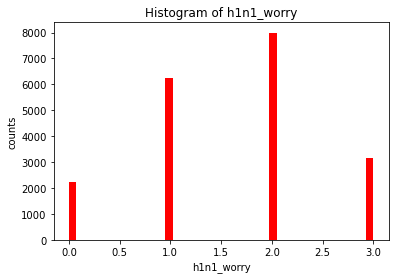

In [17]:
#__________________ 2 h1n1_worry [0,1,2,3] ordered
#______histogram
#_run in block
plt.hist(df_vac.h1n1_worry, bins = 'auto', facecolor = 'red')
plt.xlabel('h1n1_worry')
plt.ylabel('counts')
plt.title('Histogram of h1n1_worry') 

<AxesSubplot:>

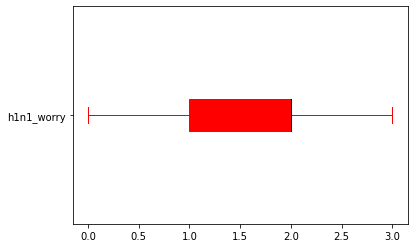

In [18]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['h1n1_worry'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [19]:
df_vac.h1n1_worry.isnull().sum() #0 Missing values
df_vac.h1n1_worry.value_counts()

2.0    7989
1.0    6229
3.0    3175
0.0    2249
Name: h1n1_worry, dtype: int64

In [20]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('h1n1_worry ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
# 1.564e-79 ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    278.817902  278.817902  359.846071  1.564062e-79
Residual      19640.0  15217.572282    0.774825         NaN           NaN


In [21]:
# let's judge from chisquare way!
from scipy.stats import chi2_contingency
ct_worry = pd.crosstab(df_vac.h1n1_vaccine, df_vac.h1n1_worry)
chi2_contingency(ct_worry, correction = False)
# p_val = 4.9e-78, Ho reject, hence association exists, good predictor 

(361.4688796942114,
 4.900068231096281e-78,
 3,
 array([[1732.14906832, 4797.49068323, 6153.01863354, 2445.34161491],
        [ 516.85093168, 1431.50931677, 1835.98136646,  729.65838509]]))

Text(0.5, 1.0, 'Histogram of h1n1_awareness')

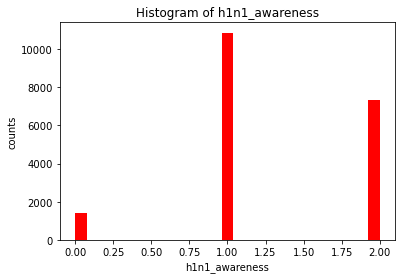

In [22]:
#_____________________________# 3 h1n1_awareness [0,1,2] ordered
#______histogram
#_run in block
plt.hist(df_vac.h1n1_awareness, bins = 'auto', facecolor = 'red')
plt.xlabel('h1n1_awareness')
plt.ylabel('counts')
plt.title('Histogram of h1n1_awareness') 

<AxesSubplot:>

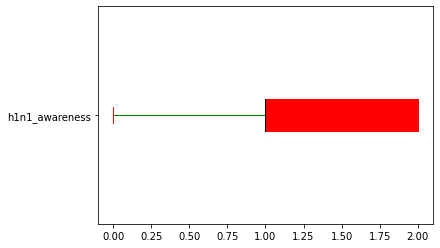

In [23]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['h1n1_awareness'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers


In [24]:
df_vac.h1n1_awareness.isnull().sum() #0 Missing values
df_vac.h1n1_awareness.value_counts() 

1.0    10861
2.0     7362
0.0     1419
Name: h1n1_awareness, dtype: int64

Text(0.5, 1.0, 'Countplot of h1n1_awareness')

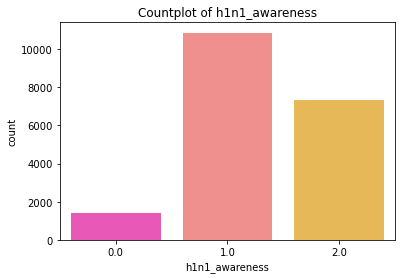

In [25]:
# Bar Plot
sns.countplot(x = 'h1n1_awareness', data = df_vac , palette = 'spring')
plt.title('Countplot of h1n1_awareness')

In [26]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('h1n1_awareness ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#3.442e-70 ie  p_value is <0.05; Ho Reject; Good Predictor

                   df       sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0   110.644675  110.644675  316.210167  3.441770e-70
Residual      19640.0  6872.206002    0.349909         NaN           NaN


In [27]:
#_______________ 4 antiviral_medication [0 and 1]

df_vac.antiviral_medication.isnull().sum() #0 Missing values
df_vac.antiviral_medication.value_counts() 

0.0    18671
1.0      971
Name: antiviral_medication, dtype: int64

Text(0.5, 1.0, 'Countplot of antiviral_medication')

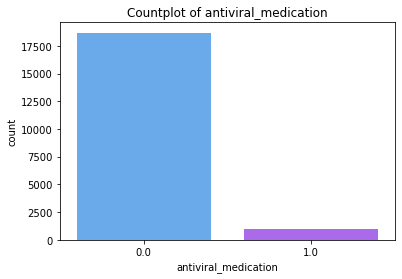

In [28]:
# Bar Plot
sns.countplot(x = 'antiviral_medication', data = df_vac , palette = 'cool')
plt.title('Countplot of antiviral_medication')

In [29]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_antiviral = pd.crosstab(df_vac.h1n1_vaccine, df_vac.antiviral_medication)
chi2_contingency(ct_antiviral, correction = False)
# p_val = 3.9e-7, Ho reject, hence association exists, good predictor 

(25.7430310280289,
 3.900328532557542e-07,
 1,
 array([[14380.14906832,   747.85093168],
        [ 4290.85093168,   223.14906832]]))

In [30]:
#________________ 5 contact_avoidance [0 and 1]

df_vac.contact_avoidance.isnull().sum() #0 Missing values
df_vac.contact_avoidance.value_counts()

1.0    14544
0.0     5098
Name: contact_avoidance, dtype: int64

Text(0.5, 1.0, 'Countplot of contact_avoidance')

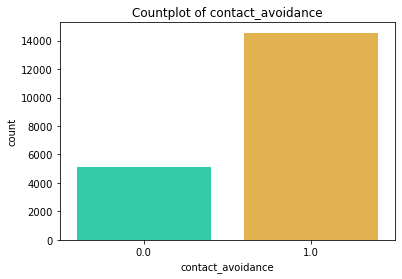

In [31]:
# Bar Plot
sns.countplot(x = 'contact_avoidance', data = df_vac , palette = 'turbo')
plt.title('Countplot of contact_avoidance')

In [32]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_avoid = pd.crosstab(df_vac.h1n1_vaccine, df_vac.contact_avoidance)
chi2_contingency(ct_avoid, correction = False)
# p_val = 6.6 e-10, Ho reject, hence association exists, good predictor 

(38.119047488867295,
 6.655721920427935e-10,
 1,
 array([[ 3926.40993789, 11201.59006211],
        [ 1171.59006211,  3342.40993789]]))

In [33]:
#_________________ 6 bought_face_mask [0 and 1]

df_vac.bought_face_mask.isnull().sum() #0 Missing values
df_vac.bought_face_mask.value_counts()

0.0    18312
1.0     1330
Name: bought_face_mask, dtype: int64

Text(0.5, 1.0, 'Countplot of bought_face_mask')

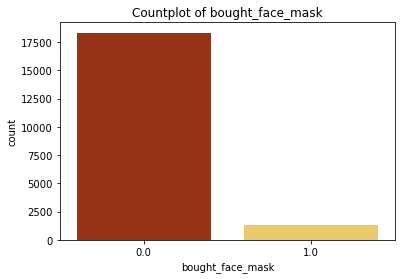

In [34]:
# Bar Plot
sns.countplot(x = 'bought_face_mask', data = df_vac , palette = 'afmhot')
plt.title('Countplot of bought_face_mask')

In [35]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_avoid = pd.crosstab(df_vac.h1n1_vaccine, df_vac.bought_face_mask)
chi2_contingency(ct_avoid, correction = False)
# p_val = 4.88-e-26, Ho reject, hence association exists, good predictor 

(111.38079745607507,
 4.8829999983371125e-26,
 1,
 array([[14103.65217391,  1024.34782609],
        [ 4208.34782609,   305.65217391]]))

In [36]:
#________________ 7 wash_hands_frequently [0 and 1] 

df_vac.wash_hands_frequently.isnull().sum() #0 Missing values
df_vac.wash_hands_frequently.value_counts()

1.0    16399
0.0     3243
Name: wash_hands_frequently, dtype: int64

Text(0.5, 1.0, 'Countplot of wash_hands_frequently')

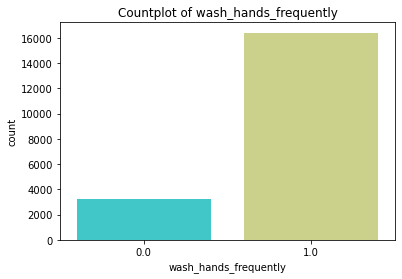

In [37]:
# Bar Plot
sns.countplot(x = 'wash_hands_frequently', data = df_vac , palette = 'rainbow')
plt.title('Countplot of wash_hands_frequently')


In [38]:
#Hypothesis Testing
ct_wash = pd.crosstab(df_vac.h1n1_vaccine, df_vac.wash_hands_frequently)
chi2_contingency(ct_wash, correction = False)
# p_val = 4.3 e-26, Ho reject, hence association exists, good predictor 

(111.62137100015417,
 4.32500265148964e-26,
 1,
 array([[ 2497.71428571, 12630.28571429],
        [  745.28571429,  3768.71428571]]))

In [39]:
#__________________ 8 avoid_large_gatherings [0 and 1]

df_vac.avoid_large_gatherings.isnull().sum() #0 Missing values
df_vac.avoid_large_gatherings.value_counts()

0.0    12703
1.0     6939
Name: avoid_large_gatherings, dtype: int64

Text(0.5, 1.0, 'Countplot of avoid_large_gatherings')

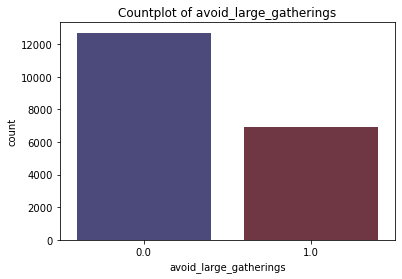

In [40]:
# Bar Plot
sns.countplot(x = 'avoid_large_gatherings', data = df_vac , palette = 'icefire')
plt.title('Countplot of avoid_large_gatherings')

In [41]:
#Hypothesis Testing
ct_gath = pd.crosstab(df_vac.h1n1_vaccine, df_vac.avoid_large_gatherings)
chi2_contingency(ct_gath, correction = False)
# p_val = 0.004, Ho reject, hence association exists, good predictor 

(8.326019959345679,
 0.003908118862931521,
 1,
 array([[9783.67701863, 5344.32298137],
        [2919.32298137, 1594.67701863]]))

In [42]:
#______________ 9 reduced_outside_home_cont [0 and 1] 
df_vac.reduced_outside_home_cont.isnull().sum() #0 Missing values
df_vac.reduced_outside_home_cont.value_counts()

0.0    13159
1.0     6483
Name: reduced_outside_home_cont, dtype: int64

Text(0.5, 1.0, 'Countplot of reduced_outside_home_cont')

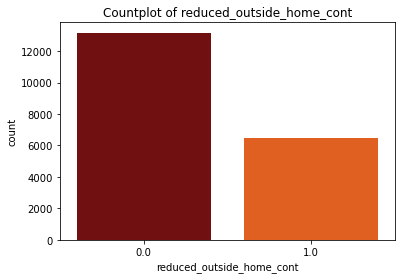

In [43]:
# Bar Plot
sns.countplot(x = 'reduced_outside_home_cont', data = df_vac , palette = 'gist_heat')
plt.title('Countplot of reduced_outside_home_cont')

In [44]:
#Hypothesis Testing
ct_outside = pd.crosstab(df_vac.h1n1_vaccine, df_vac.reduced_outside_home_cont)
chi2_contingency(ct_outside, correction = False)
# p_val = 0.015, Ho reject, hence association exists, good predictor 

(5.859941970831115,
 0.015489304669565737,
 1,
 array([[10134.88198758,  4993.11801242],
        [ 3024.11801242,  1489.88198758]]))

In [45]:
#__________________10 avoid_touch_face [0 and 1]
df_vac.avoid_touch_face.isnull().sum() #0 Missing values
df_vac.avoid_touch_face.value_counts()

1.0    13455
0.0     6187
Name: avoid_touch_face, dtype: int64

Text(0.5, 1.0, 'Countplot of avoid_touch_face')

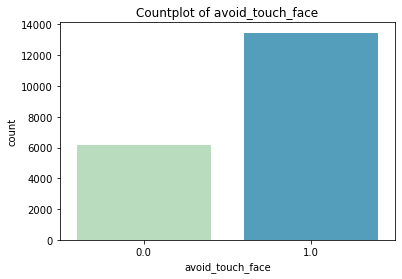

In [46]:
# Bar Plot
sns.countplot(x = 'avoid_touch_face', data = df_vac , palette = 'GnBu')
plt.title('Countplot of avoid_touch_face')

In [47]:
#Hypothesis Testing
ct_face = pd.crosstab(df_vac.h1n1_vaccine, df_vac.avoid_touch_face)
chi2_contingency(ct_face, correction = False)
# p_val = 1.5e-23, Ho reject, hence association exists, good predictor 


(99.97660321127165,
 1.5420802703508326e-23,
 1,
 array([[ 4765.14285714, 10362.85714286],
        [ 1421.85714286,  3092.14285714]]))

In [48]:
#_____________________ 11 dr_recc_h1n1_vacc [0 and 1]
df_vac.dr_recc_h1n1_vacc.isnull().sum() #0 Missing values
df_vac.dr_recc_h1n1_vacc.value_counts() 

0.0    15203
1.0     4439
Name: dr_recc_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'Histogram of dr_recc_h1n1_vacc')

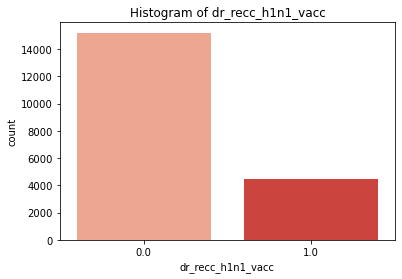

In [49]:
# Bar Plot
sns.countplot(x = 'dr_recc_h1n1_vacc', data = df_vac , palette = 'Reds')
plt.title('Histogram of dr_recc_h1n1_vacc')

In [50]:
#Hypothesis Testing
ct_drrec = pd.crosstab(df_vac.h1n1_vaccine, df_vac.dr_recc_h1n1_vacc)
chi2_contingency(ct_drrec, correction = False)
# p_val = 0, Ho reject, hence association exists, good predictor

(3094.6916755786597,
 0.0,
 1,
 array([[11709.14285714,  3418.85714286],
        [ 3493.85714286,  1020.14285714]]))

In [51]:
#_______________ 12 dr_recc_seasonal_vacc [0 and 1]
df_vac.dr_recc_seasonal_vacc.isnull().sum() #0 Missing values
df_vac.dr_recc_seasonal_vacc.value_counts()

0.0    13091
1.0     6551
Name: dr_recc_seasonal_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of dr_recc_seasonal_vacc')

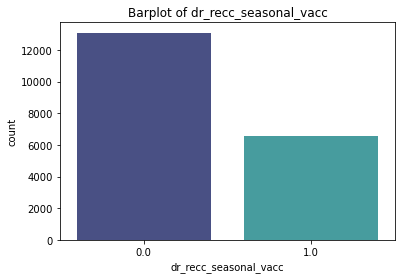

In [52]:
# Bar Plot
sns.countplot(x = 'dr_recc_seasonal_vacc', data = df_vac , palette = 'mako')
plt.title('Barplot of dr_recc_seasonal_vacc')

In [53]:
#Hypothesis Testing
ct_drseason = pd.crosstab(df_vac.h1n1_vaccine, df_vac.dr_recc_seasonal_vacc)
chi2_contingency(ct_drseason, correction = False)
# p_val = 2.2e-192, Ho reject, hence association exists, good predictor

(875.3779473401858,
 2.21025047497519e-192,
 1,
 array([[10082.50931677,  5045.49068323],
        [ 3008.49068323,  1505.50931677]]))

In [54]:
#________________________ 13 chronic_medic_condition [0 and 1]
df_vac.chronic_medic_condition.isnull().sum() #0 Missing values
df_vac.chronic_medic_condition.value_counts() 

0.0    14066
1.0     5576
Name: chronic_medic_condition, dtype: int64

Text(0.5, 1.0, 'Barplot of chronic_medic_condition')

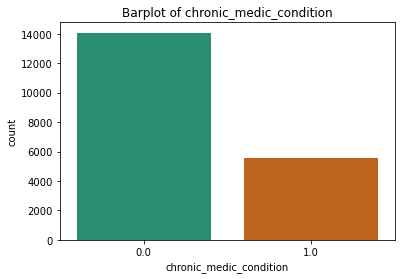

In [55]:
# Bar Plot
sns.countplot(x = 'chronic_medic_condition', data = df_vac , palette = 'Dark2')
plt.title('Barplot of chronic_medic_condition')

In [56]:
#Hypothesis Testing
ct_chronic = pd.crosstab(df_vac.h1n1_vaccine, df_vac.chronic_medic_condition)
chi2_contingency(ct_chronic, correction = False)
# p_val = 1.39e-49, Ho reject, hence association exists, good predictor 

(219.14944840010486,
 1.3864754403096512e-49,
 1,
 array([[10833.44099379,  4294.55900621],
        [ 3232.55900621,  1281.44099379]]))

In [57]:
#_________________ 14 cont_child_undr_6_mnths [0 and 1]
df_vac.cont_child_undr_6_mnths.isnull().sum() #0 Missing values
df_vac.cont_child_undr_6_mnths.value_counts()

0.0    17995
1.0     1647
Name: cont_child_undr_6_mnths, dtype: int64

Text(0.5, 1.0, 'Barplot of cont_child_undr_6_mnths')

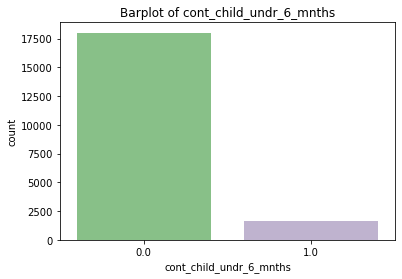

In [58]:
# Bar Plot
sns.countplot(x = 'cont_child_undr_6_mnths', data = df_vac , palette = 'Accent')
plt.title('Barplot of cont_child_undr_6_mnths')

In [59]:
#Hypothesis Testing
ct_child = pd.crosstab(df_vac.h1n1_vaccine, df_vac.cont_child_undr_6_mnths)
chi2_contingency(ct_child, correction = False)
# p_val = 9.2e-26, Ho reject, hence association exists, good predictor

(110.12378230842235,
 9.205896231946304e-26,
 1,
 array([[13859.50310559,  1268.49689441],
        [ 4135.49689441,   378.50310559]]))

In [60]:
#____________________ 15 is_health_worker [0 and 1]
df_vac.is_health_worker.isnull().sum() #0 Missing values
df_vac.is_health_worker.value_counts()

0.0    17310
1.0     2332
Name: is_health_worker, dtype: int64

Text(0.5, 1.0, 'Countplot of is_health_worker')

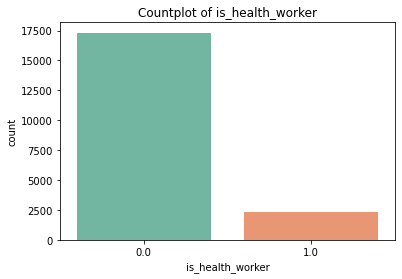

In [61]:
# Bar Plot
sns.countplot(x = 'is_health_worker', data = df_vac , palette = 'Set2')
plt.title('Countplot of is_health_worker')

In [62]:
#Hypothesis Testing
ct_hw = pd.crosstab(df_vac.h1n1_vaccine, df_vac.is_health_worker)
chi2_contingency(ct_hw, correction = False)
# p_val = 4e-152, Ho reject, hence association exists, good predictor 

(690.2288349047097,
 3.985927974118901e-152,
 1,
 array([[13331.92546584,  1796.07453416],
        [ 3978.07453416,   535.92546584]]))

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

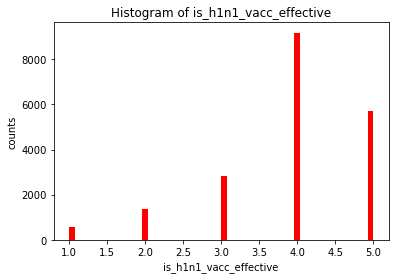

In [63]:
#____________________ 16 is_h1n1_vacc_effective [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.is_h1n1_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_vacc_effective')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_vacc_effective')

<AxesSubplot:>

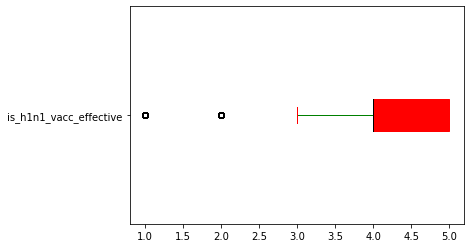

In [64]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_h1n1_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False)

In [65]:
# few outliers on lower side; IGNORE! 
df_vac.is_h1n1_vacc_effective.isnull().sum() #0 Missing values
df_vac.is_h1n1_vacc_effective.value_counts()

4.0    9172
5.0    5715
3.0    2838
2.0    1347
1.0     570
Name: is_h1n1_vacc_effective, dtype: int64

Text(0.5, 1.0, 'Countplot of is_h1n1_vacc_effective')

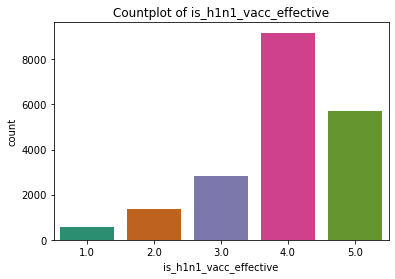

In [66]:
# Bar Plot
sns.countplot(x = 'is_h1n1_vacc_effective', data = df_vac , palette = 'Dark2')
plt.title('Countplot of is_h1n1_vacc_effective')

In [67]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_h1n1_vacc_effective~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0  ie p_value which is <0.05; Ho Reject; Good Predictor


                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   1411.109998  1411.109998  1579.950867     0.0
Residual      19640.0  17541.178618     0.893135          NaN     NaN


Text(0.5, 1.0, 'Histogram of is_h1n1_risky')

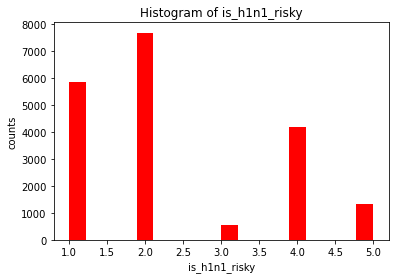

In [68]:
#_______________________ 17 is_h1n1_risky [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.is_h1n1_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('is_h1n1_risky')
plt.ylabel('counts')
plt.title('Histogram of is_h1n1_risky')

<AxesSubplot:>

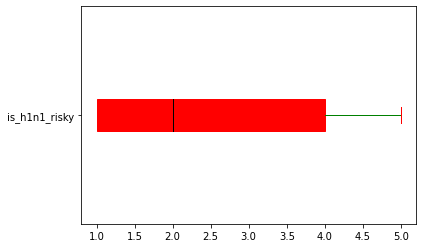

In [69]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_h1n1_risky'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [70]:
df_vac.is_h1n1_risky.isnull().sum() #0 Missing values
df_vac.is_h1n1_risky.value_counts()

2.0    7691
1.0    5881
4.0    4184
5.0    1348
3.0     538
Name: is_h1n1_risky, dtype: int64

Text(0.5, 1.0, 'Barplot of is_h1n1_risky')

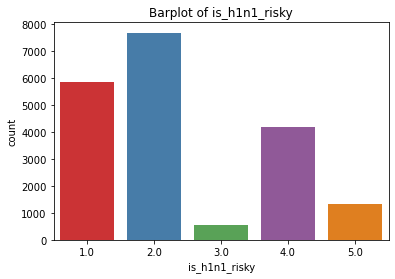

In [71]:
# Bar Plot
sns.countplot(x = 'is_h1n1_risky', data = df_vac , palette = 'Set1')
plt.title('Barplot of is_h1n1_risky')

In [72]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_h1n1_risky ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0  ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   4134.782428  4134.782428  2838.602067     0.0
Residual      19640.0  28608.140543     1.456626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_h1n1_vacc')

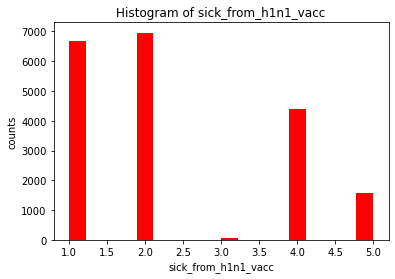

In [73]:
#____________________ 18 sick_from_h1n1_vacc [1,2,3,4,5] ordered 
#______histogram
#_run in block
plt.hist(df_vac.sick_from_h1n1_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_h1n1_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_h1n1_vacc')

<AxesSubplot:>

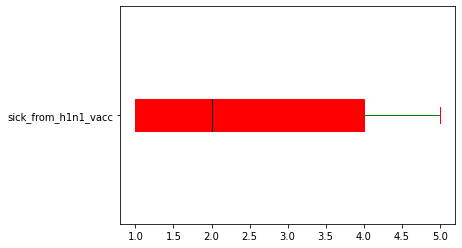

In [74]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['sick_from_h1n1_vacc'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [75]:
df_vac.sick_from_h1n1_vacc.isnull().sum() #0 Missing values
df_vac.sick_from_h1n1_vacc.value_counts() 

2.0    6956
1.0    6684
4.0    4390
5.0    1560
3.0      52
Name: sick_from_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'Countplot of sick_from_h1n1_vacc')

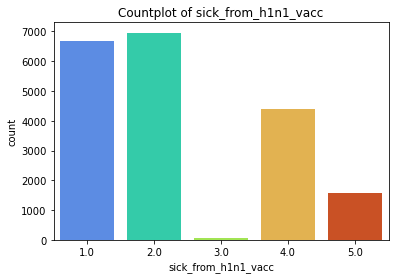

In [76]:
# Bar Plot
sns.countplot(x = 'sick_from_h1n1_vacc', data = df_vac , palette = 'turbo')
plt.title('Countplot of sick_from_h1n1_vacc')


In [77]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_h1n1_vacc ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#3.62e-31  ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq     mean_sq           F        PR(>F)
h1n1_vaccine      1.0    246.018980  246.018980  135.282692  3.623260e-31
Residual      19640.0  35716.414988    1.818555         NaN           NaN


Text(0.5, 1.0, 'Countplot of is_seas_vacc_effective')

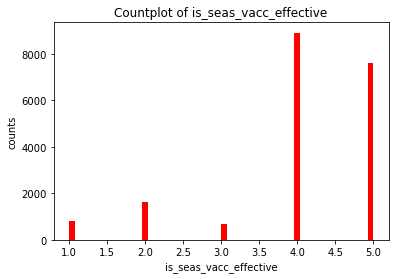

In [78]:
#_______________ 19 is_seas_vacc_effective [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.is_seas_vacc_effective, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_vacc_effective')
plt.ylabel('counts')
plt.title('Countplot of is_seas_vacc_effective') 

<AxesSubplot:>

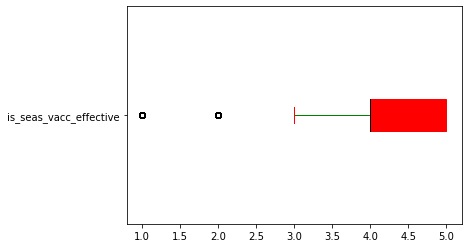

In [79]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_seas_vacc_effective'].plot.box(color=props2, patch_artist = True, vert = False) 

In [80]:
df_vac.is_seas_vacc_effective.isnull().sum() #0 Missing values
df_vac.is_seas_vacc_effective.value_counts() 

4.0    8906
5.0    7603
2.0    1638
1.0     822
3.0     673
Name: is_seas_vacc_effective, dtype: int64

Text(0.5, 1.0, 'Barplot of is_seas_vacc_effective')

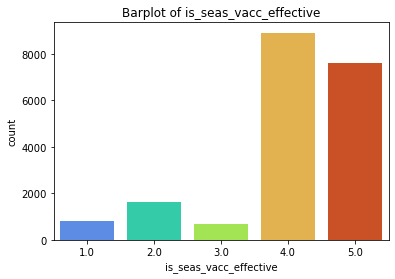

In [81]:
# Bar Plot
sns.countplot(x = 'is_seas_vacc_effective', data = df_vac , palette = 'turbo')
plt.title('Barplot of is_seas_vacc_effective')

In [82]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_seas_vacc_effective ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#9.2e-152 ie p_value is <0.05; Ho Reject; Good Predictor

                   df        sum_sq     mean_sq           F         PR(>F)
h1n1_vaccine      1.0    763.264159  763.264159  700.789605  9.196705e-152
Residual      19640.0  21390.882466    1.089149         NaN            NaN


In [83]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

Text(0.5, 1.0, 'Histogram of is_seas_risky')

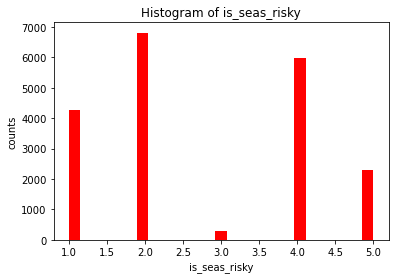

In [84]:
#_____________________ 20 is_seas_risky [1,2,3,4,5] ordered 
#______histogram
#_run in block
plt.hist(df_vac.is_seas_risky, bins = 'auto', facecolor = 'red')
plt.xlabel('is_seas_risky')
plt.ylabel('counts')
plt.title('Histogram of is_seas_risky') 

2.0    6811
4.0    5984
1.0    4258
5.0    2286
3.0     303
Name: is_seas_risky, dtype: int64

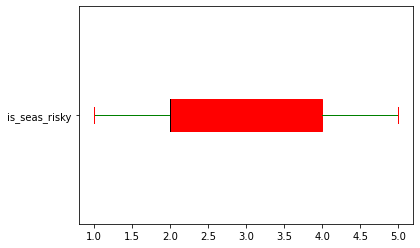

In [85]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['is_seas_risky'].plot.box(color=props2, patch_artist = True, vert = False) 
# no outliers 
df_vac.is_seas_risky.isnull().sum() #0 Missing values
df_vac.is_seas_risky.value_counts() 

Text(0.5, 1.0, 'Barplot of is_seas_risky')

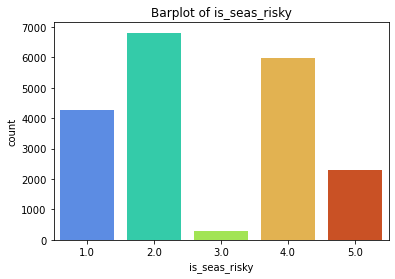

In [86]:
# Bar Plot
sns.countplot(x = 'is_seas_risky', data = df_vac , palette = 'turbo')
plt.title('Barplot of is_seas_risky')

In [87]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('is_seas_risky ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.0 ie p_value which is <0.05; Ho Reject; Good Predictor

                   df        sum_sq      mean_sq            F  PR(>F)
h1n1_vaccine      1.0   2938.840524  2938.840524  1655.101131     0.0
Residual      19640.0  34873.293730     1.775626          NaN     NaN


Text(0.5, 1.0, 'Histogram of sick_from_seas_vacc')

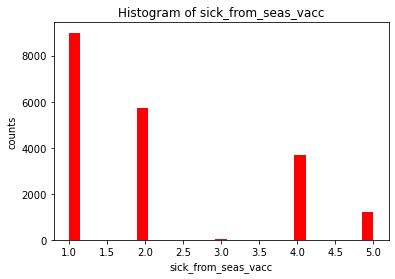

In [88]:
#___________________ 21 sick_from_seas_vacc [1,2,3,4,5] ordered
#______histogram
#_run in block
plt.hist(df_vac.sick_from_seas_vacc, bins = 'auto', facecolor = 'red')
plt.xlabel('sick_from_seas_vacc')
plt.ylabel('counts')
plt.title('Histogram of sick_from_seas_vacc')

<AxesSubplot:>

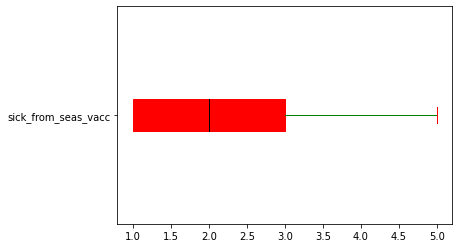

In [89]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['sick_from_seas_vacc'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers


In [90]:
df_vac.sick_from_seas_vacc.isnull().sum() #0 Missing values
df_vac.sick_from_seas_vacc.value_counts() 

1.0    8996
2.0    5713
4.0    3683
5.0    1221
3.0      29
Name: sick_from_seas_vacc, dtype: int64

Text(0.5, 1.0, 'Barplot of sick_from_seas_vacc')

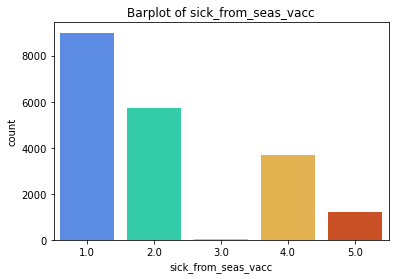

In [91]:
# Bar Plot
sns.countplot(x = 'sick_from_seas_vacc', data = df_vac , palette = 'turbo')
plt.title('Barplot of sick_from_seas_vacc')

In [94]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('sick_from_seas_vacc ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.36 ie p_value is >0.05; Ho accepted; Bad Predictor


                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      1.496253  1.496253  0.851088  0.356256
Residual      19640.0  34528.036789  1.758047       NaN       NaN


In [95]:

df_vac['age_bracket'] =df_vac.get('age_bracket').replace('65+ Years', 5)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('55 - 64 Years', 4)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('45 - 54 Years', 3)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('18 - 34 Years', 1)
df_vac['age_bracket'] =df_vac.get('age_bracket').replace('35 - 44 Years', 2)
# ignore warnings ! 



C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2086898981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['age_bracket'] =df_vac.get('age_bracket').replace('65+ Years', 5)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2086898981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['age_bracket'] =df_vac.get('age_bracket').replace('55 - 64 Years', 4)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2086898981.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [96]:
df_vac.age_bracket.isnull().sum()
df_vac.age_bracket.value_counts()

5    4491
4    4234
3    4038
1    3925
2    2954
Name: age_bracket, dtype: int64

<AxesSubplot:>

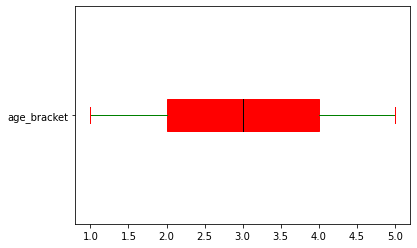

In [97]:
# now boxplot will come
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df_vac['age_bracket'].plot.box(color=props2, patch_artist = True, vert = False) #No outliers

In [98]:
#__________________________we could have followed a more easier way! 
# label encoding the data ; its good for nominal data , not good for ordered data
# like in our present case!
# DO NOT TRY AS IT HAS ALREAY BEING DONE !!!!
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  

In [99]:
#df_vac['age_bracket']= le.fit_transform(df_vac['age_bracket']) 
df_vac.age_bracket.value_counts()

5    4491
4    4234
3    4038
1    3925
2    2954
Name: age_bracket, dtype: int64

Text(0.5, 1.0, 'Barplot of age_bracket')

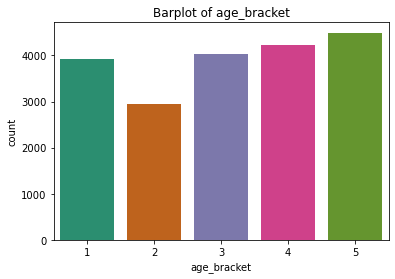

In [100]:
# Bar Plot
sns.countplot(x = 'age_bracket', data = df_vac , palette = 'Dark2')
plt.title('Barplot of age_bracket')

In [101]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('age_bracket ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#1.5e-10 ie p_value is <0.05; Ho rejected; Good Predictor

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     84.712087  84.712087  41.109469  1.472151e-10
Residual      19640.0  40471.098931   2.060647        NaN           NaN


In [102]:
#__________________ 23 qualification - object, Actually ordered! 3 levels
df_vac.qualification.isnull().sum() 
df_vac.qualification.value_counts()

College Graduate    8165
Some College        5570
12 Years            4287
< 12 Years          1620
Name: qualification, dtype: int64

In [103]:
# let's put them in order
df_vac['qualification'] =df_vac.get('qualification').replace('College Graduate', 4)
df_vac['qualification'] =df_vac.get('qualification').replace('Some College', 3)
df_vac['qualification'] =df_vac.get('qualification').replace('12 Years', 2)
df_vac['qualification'] =df_vac.get('qualification').replace('< 12 Years', 1)


C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\3913644751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['qualification'] =df_vac.get('qualification').replace('College Graduate', 4)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\3913644751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['qualification'] =df_vac.get('qualification').replace('Some College', 3)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\3913644751.py:4: SettingWithCopyWarning: 
A value is trying 

In [104]:
df_vac.qualification.value_counts()

4    8165
3    5570
2    4287
1    1620
Name: qualification, dtype: int64

Text(0.5, 1.0, 'Barplot of qualification')

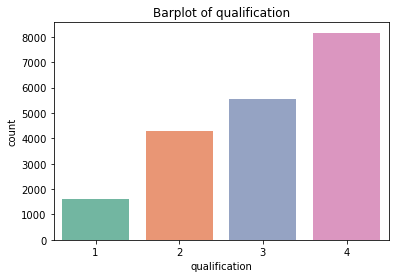

In [105]:
# Bar Plot
sns.countplot(x = 'qualification', data = df_vac , palette = 'Set2')
plt.title('Barplot of qualification')

In [106]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('qualification ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#1.57e-22 ie p_value is <0.05; Ho rejected; Good Predictor

                   df        sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0     91.618704  91.618704  95.612329  1.572981e-22
Residual      19640.0  18819.658151   0.958231        NaN           NaN


In [107]:
#_________________ 24 race - object [NO ORDER, NOMINAL]; 4 levels
df_vac.race.isnull().sum() #No Missing values
df_vac.race.value_counts() 

White                15745
Black                 1474
Hispanic              1295
Other or Multiple     1128
Name: race, dtype: int64

In [108]:
# label encoding 'race' ; does alphabetically! 
# HERE WE CAN USE LabelEncoder!
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 

In [109]:
df_vac['race']= le.fit_transform(df_vac['race']) 
df_vac.race.value_counts()

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\276460331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['race']= le.fit_transform(df_vac['race'])


3    15745
0     1474
1     1295
2     1128
Name: race, dtype: int64

Text(0.5, 1.0, 'Countplot of race')

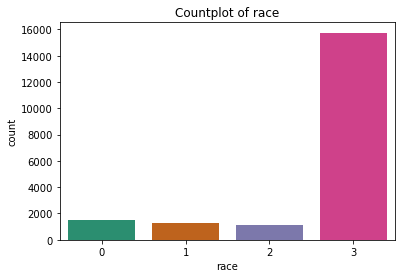

In [110]:
# Bar Plot
sns.countplot(x = 'race', data = df_vac , palette = 'Dark2')
plt.title('Countplot of race')


In [111]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_race = pd.crosstab(df_vac.h1n1_vaccine, df_vac.race)
chi2_contingency(ct_race, correction = False)
# p_val = 2.4e-10, Ho reject, hence association exists, good predictor 


(47.734514060409225,
 2.425304962460163e-10,
 3,
 array([[ 1135.25465839,   997.39130435,   868.77018634, 12126.58385093],
        [  338.74534161,   297.60869565,   259.22981366,  3618.41614907]]))

In [112]:
#___________________ 25 sex - object [female, male]
df_vac.sex.isnull().sum() #No Missing values
df_vac.sex.value_counts()

Female    11638
Male       8004
Name: sex, dtype: int64

In [113]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [114]:
df_vac['sex']= le.fit_transform(df_vac['sex']) 
df_vac.sex.value_counts()

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\1151057439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['sex']= le.fit_transform(df_vac['sex'])


0    11638
1     8004
Name: sex, dtype: int64

Text(0.5, 1.0, 'Countplot of sex')

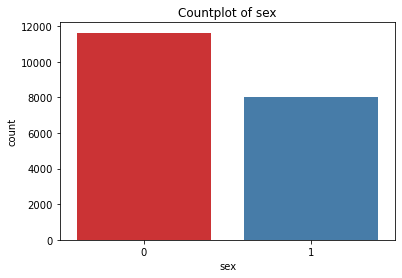

In [115]:
# Bar Plot
sns.countplot(x = 'sex', data = df_vac , palette = 'Set1')
plt.title('Countplot of sex')

In [116]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_sex = pd.crosstab(df_vac.h1n1_vaccine, df_vac.sex)
chi2_contingency(ct_sex, correction = False)
# p_val = 00, Ho reject, hence association exists, good predictor 

(12.498872792045749,
 0.0004071976301199202,
 1,
 array([[8963.42857143, 6164.57142857],
        [2674.57142857, 1839.42857143]]))

In [117]:
#______________ 26 income_level - object, its ordered
df_vac.income_level.isnull().sum() # no missing values 
df_vac.income_level.value_counts()

<= $75,000, Above Poverty    11185
> $75,000                     6159
Below Poverty                 2298
Name: income_level, dtype: int64

In [118]:
#Converting to numeric/ integer
df_vac['income_level']=df_vac.get('income_level').replace('Below Poverty', 1)
df_vac['income_level']=df_vac.get('income_level').replace('<= $75,000, Above Poverty', 2)
df_vac['income_level']=df_vac.get('income_level').replace('> $75,000', 3)


C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2390358693.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['income_level']=df_vac.get('income_level').replace('Below Poverty', 1)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2390358693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['income_level']=df_vac.get('income_level').replace('<= $75,000, Above Poverty', 2)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2390358693.py:4: SettingWithCopyWarning: 
A value is try

In [119]:
df_vac.income_level.value_counts()

2    11185
3     6159
1     2298
Name: income_level, dtype: int64

In [120]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

Text(0.5, 1.0, 'Countplot of income_level')

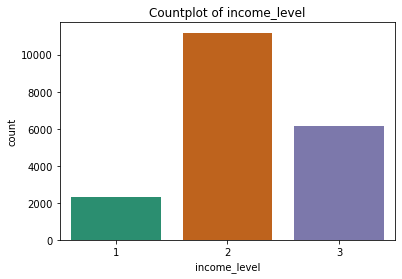

In [121]:
# Bar Plot
sns.countplot(x = 'income_level', data = df_vac , palette = 'Dark2')
plt.title('Countplot of income_level')

In [122]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('income_level ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
# 2.62e-15 ie p_value is <0.05; Ho rejected; Good Predictor

                   df       sum_sq    mean_sq          F        PR(>F)
h1n1_vaccine      1.0    24.472822  24.472822  62.636538  2.617146e-15
Residual      19640.0  7673.575900   0.390712        NaN           NaN


In [123]:
#___________________27 marital_status - object [0,1]
df_vac.marital_status.isnull().sum() #471 Missing values
df_vac.marital_status.value_counts() 

Married        10768
Not Married     8874
Name: marital_status, dtype: int64

In [124]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [125]:
df_vac['marital_status']= le.fit_transform(df_vac['marital_status']) 
df_vac.marital_status.value_counts()

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\4109331241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['marital_status']= le.fit_transform(df_vac['marital_status'])


0    10768
1     8874
Name: marital_status, dtype: int64

In [126]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

Text(0.5, 1.0, 'Countplot of marital_status')

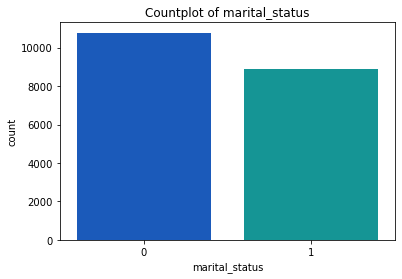

In [127]:
# Bar Plot
sns.countplot(x = 'marital_status', data = df_vac , palette = 'winter')
plt.title('Countplot of marital_status')


In [128]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_mari = pd.crosstab(df_vac.h1n1_vaccine, df_vac.marital_status)
chi2_contingency(ct_mari, correction = False)
# p_val = 2.14e-13, Ho reject, hence association exists, good predictor

(53.866122687069605,
 2.1462663932476588e-13,
 1,
 array([[8293.36645963, 6834.63354037],
        [2474.63354037, 2039.36645963]]))

In [129]:
#__________28 housing_status - object [own, rent]
df_vac.housing_status.isnull().sum()
df_vac.housing_status.value_counts() 

Own     14980
Rent     4662
Name: housing_status, dtype: int64

In [130]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()   
df_vac['housing_status']= le.fit_transform(df_vac['housing_status']) 
df_vac.housing_status.value_counts()

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\3281849152.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['housing_status']= le.fit_transform(df_vac['housing_status'])


0    14980
1     4662
Name: housing_status, dtype: int64

(24.587253027110627,
 7.101997402926761e-07,
 1,
 array([[11537.39130435,  3590.60869565],
        [ 3442.60869565,  1071.39130435]]))

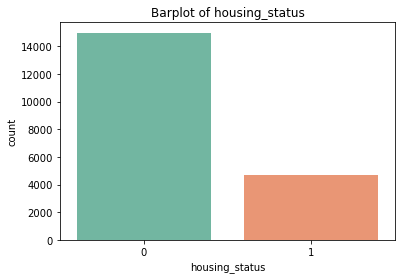

In [131]:
# Bar Plot
sns.countplot(x = 'housing_status', data = df_vac , palette = 'Set2')
plt.title('Barplot of housing_status')
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_house = pd.crosstab(df_vac.h1n1_vaccine, df_vac.housing_status)
chi2_contingency(ct_house, correction = False)
# p_val = 7.1e-07, Ho reject, hence association exists, good predictor 


In [132]:
# _______________ 29 employment - object [3 levels] actually ordered
df_vac.employment.isnull().sum() 
df_vac.employment.value_counts() 

Employed              11093
Not in Labor Force     7417
Unemployed             1132
Name: employment, dtype: int64

In [133]:
#Converting to numeric/ integer
df_vac['employment']=df_vac.get('employment').replace('Employed', 3)
df_vac['employment']=df_vac.get('employment').replace('Not in Labor Force', 2)
df_vac['employment']=df_vac.get('employment').replace('Unemployed', 1)

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2889079335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment']=df_vac.get('employment').replace('Employed', 3)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2889079335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment']=df_vac.get('employment').replace('Not in Labor Force', 2)
C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\2889079335.py:4: SettingWithCopyWarning: 
A value is trying to be set on a c

In [134]:
df_vac.employment.value_counts()

3    11093
2     7417
1     1132
Name: employment, dtype: int64

In [135]:
#____________________LabelEncoder giving opposite notation!
# label encoding the data ; DO NOT TRY THIS
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
  

In [136]:
df_vac['employment']= le.fit_transform(df_vac['employment']) 
df_vac.employment.value_counts()

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\907243926.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['employment']= le.fit_transform(df_vac['employment'])


2    11093
1     7417
0     1132
Name: employment, dtype: int64

Text(0.5, 1.0, 'Barplot of employment')

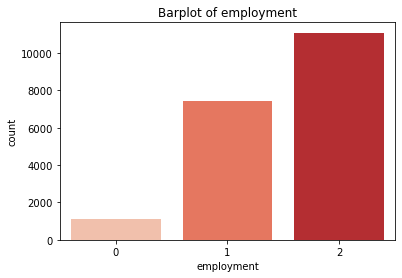

In [137]:
# Bar Plot
sns.countplot(x = 'employment', data = df_vac , palette = 'Reds')
plt.title('Barplot of employment')

In [138]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('employment ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.015 ie p_value is <0.05; Ho rejected; Good Predictor

                   df       sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0     2.168418  2.168418  5.938608  0.014822
Residual      19640.0  7171.333720  0.365139       NaN       NaN


In [139]:
#____________30 census_msa - object, 3 levels, NOMINAL
df_vac.census_msa.isnull().sum() #No Missing values
df_vac.census_msa.value_counts()

MSA, Not Principle  City    8571
MSA, Principle City         5717
Non-MSA                     5354
Name: census_msa, dtype: int64

In [140]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

In [141]:
df_vac['census_msa']= le.fit_transform(df_vac['census_msa']) 
df_vac.census_msa.value_counts()

C:\Users\Pallavi_P\AppData\Local\Temp\ipykernel_13448\4019068394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vac['census_msa']= le.fit_transform(df_vac['census_msa'])


0    8571
1    5717
2    5354
Name: census_msa, dtype: int64

Text(0.5, 1.0, 'Countplot of census_msa')

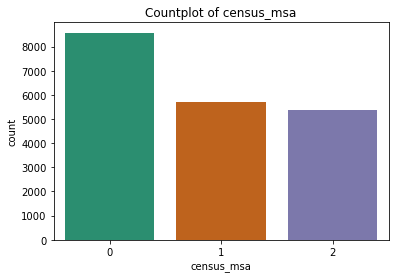

In [142]:
# Bar Plot
sns.countplot(x = 'census_msa', data = df_vac , palette = 'Dark2')
plt.title('Countplot of census_msa')

In [143]:
#Hypothesis Testing
from scipy.stats import chi2_contingency
ct_msa = pd.crosstab(df_vac.h1n1_vaccine, df_vac.census_msa)
ct_msa
chi2_contingency(ct_msa, correction = False)
# p_val = 0.76, > 0.05 Ho accept, hence association does not exists, bad predictor

(0.5600038986351584,
 0.7557822681946281,
 2,
 array([[6601.26708075, 4403.1552795 , 4123.57763975],
        [1969.73291925, 1313.8447205 , 1230.42236025]]))

In [144]:
#______________31 no_of_adults, ordered  
df_vac.no_of_adults.isnull().sum() #No Missing values
df_vac.no_of_adults.value_counts() 

1.0    11006
0.0     5683
2.0     2124
3.0      829
Name: no_of_adults, dtype: int64

Text(0.5, 1.0, 'Countplot of no_of_adults')

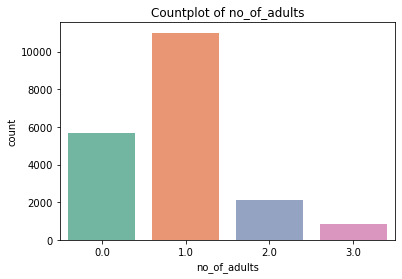

In [145]:
# Bar Plot
sns.countplot(x = 'no_of_adults', data = df_vac , palette = 'Set2')
plt.title('Countplot of no_of_adults')


In [146]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('no_of_adults ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.55 ie p_value is >0.05; Ho accepted; Bad Predictor

                   df        sum_sq   mean_sq        F    PR(>F)
h1n1_vaccine      1.0      0.192588  0.192588  0.34578  0.556518
Residual      19640.0  10938.824060  0.556967      NaN       NaN


In [147]:
#_______________ 32 no_of_children , ordered 
df_vac.no_of_children.isnull().sum() #No Missing values
df_vac.no_of_children.value_counts()

0.0    13697
1.0     2402
2.0     2207
3.0     1336
Name: no_of_children, dtype: int64

Text(0.5, 1.0, 'Countplot of no_of_children')

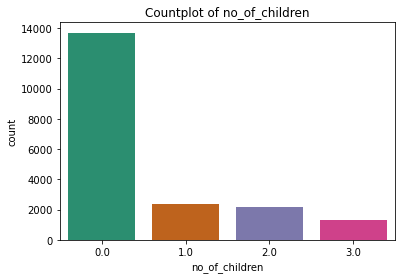

In [148]:
# Bar Plot
sns.countplot(x = 'no_of_children', data = df_vac , palette = 'Dark2')
plt.title('Countplot of no_of_children')

In [149]:
#Hypothesis Testing
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('no_of_children ~ h1n1_vaccine', data = df_vac).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)
#0.63 ie p_value is >0.05; Ho accepted; Bad Predictor

                   df        sum_sq   mean_sq         F    PR(>F)
h1n1_vaccine      1.0      0.202039  0.202039  0.229512  0.631891
Residual      19640.0  17289.080722  0.880299       NaN       NaN


In [150]:
df_vac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [151]:
'''
lets delete
index 19, sick_from_seas_vacc
index 28, census_msa
index 29, no_of_adults
index 30, no_of_children

AND SAVE NEW DATA AS hn and export to wd and 
THEN START A NEW SCRIPT
'''
hn = df_vac.drop(['sick_from_seas_vacc','census_msa','no_of_adults','no_of_children'], axis = 1)
hn.info() # 19642, 28 columns 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [152]:
hn.to_csv('hn.csv')


In [153]:
#________lets create dummy variables for 'race'

df2 = pd.get_dummies(hn.race, drop_first = True, prefix = 'race')

hnd = pd.concat([hn, df2], axis = 1)

In [154]:
# we must remove the original col 'race'

hnc = hnd.drop(['race'], axis = 1)
hnc.info() #19642, 30 columns 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19642 entries, 0 to 26706
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 19642 non-null  float64
 1   h1n1_awareness             19642 non-null  float64
 2   antiviral_medication       19642 non-null  float64
 3   contact_avoidance          19642 non-null  float64
 4   bought_face_mask           19642 non-null  float64
 5   wash_hands_frequently      19642 non-null  float64
 6   avoid_large_gatherings     19642 non-null  float64
 7   reduced_outside_home_cont  19642 non-null  float64
 8   avoid_touch_face           19642 non-null  float64
 9   dr_recc_h1n1_vacc          19642 non-null  float64
 10  dr_recc_seasonal_vacc      19642 non-null  float64
 11  chronic_medic_condition    19642 non-null  float64
 12  cont_child_undr_6_mnths    19642 non-null  float64
 13  is_health_worker           19642 non-null  flo

In [155]:
hnc.to_csv('hnc.csv')

In [156]:
import os
os.chdir('C:\\Users\\Pallavi_P\\Desktop\\WD_Python')
import pandas as pd 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

In [157]:
df = pd.read_csv('hnc.csv') #19642; 31 , 1st is unique id 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [158]:
#_______________VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [159]:
# first put your predictors in x
x = df.iloc[:, [1,2,15,16,17,18,19,20,21,23,26]] # x is a data frame

In [160]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns 

In [161]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

In [162]:
print(vif_data) # two columns, feature & VIF will appear

                   feature        VIF
0               h1n1_worry   5.760260
1           h1n1_awareness   6.614486
2   is_h1n1_vacc_effective  21.012104
3            is_h1n1_risky   7.199900
4      sick_from_h1n1_vacc   4.643447
5   is_seas_vacc_effective  20.713540
6            is_seas_risky   8.017016
7              age_bracket   5.486319
8            qualification  13.197759
9             income_level  16.193963
10              employment   7.636121


In [163]:
# drop VIF> 10
df = df.drop(['is_h1n1_vacc_effective', 'is_seas_vacc_effective',
               'qualification', 'employment'], axis = 1)

In [164]:
df.info() # 19642, 27 [with 1st as Unnamed: 0, lets remove this]
df = df.drop(['Unnamed: 0'], axis = 1)
df.info() # 19642, 26
df.to_csv('hnvif.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19642 entries, 0 to 19641
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 19642 non-null  int64  
 1   h1n1_worry                 19642 non-null  float64
 2   h1n1_awareness             19642 non-null  float64
 3   antiviral_medication       19642 non-null  float64
 4   contact_avoidance          19642 non-null  float64
 5   bought_face_mask           19642 non-null  float64
 6   wash_hands_frequently      19642 non-null  float64
 7   avoid_large_gatherings     19642 non-null  float64
 8   reduced_outside_home_cont  19642 non-null  float64
 9   avoid_touch_face           19642 non-null  float64
 10  dr_recc_h1n1_vacc          19642 non-null  float64
 11  dr_recc_seasonal_vacc      19642 non-null  float64
 12  chronic_medic_condition    19642 non-null  float64
 13  cont_child_undr_6_mnths    19642 non-null  flo

In [165]:
# X and y
X = df.loc[:, df.columns != 'h1n1_vaccine']
y = df.loc[:, df.columns == 'h1n1_vaccine']

In [166]:
# solver = liblinear
'''
liblinear [library for linear classification]: good for small data
newton-cg [newton conjugate]: can be used in this case
lbfgs[limited memory BFGS]: for multiclass problems
BFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm 
sag [Stochastic Average Gradient Descent]: good for large data sets
saga: a little variant of sag
'''

'\nliblinear [library for linear classification]: good for small data\nnewton-cg [newton conjugate]: can be used in this case\nlbfgs[limited memory BFGS]: for multiclass problems\nBFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm \nsag [Stochastic Average Gradient Descent]: good for large data sets\nsaga: a little variant of sag\n'

In [167]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X, y)
model1.intercept_
model1.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.04498622,  0.23585599,  0.08002784, -0.02169612,  0.11127951,
         0.06433442, -0.18866288, -0.09143329,  0.02792018,  2.01272413,
        -0.55614926,  0.13015877,  0.23410969,  0.86014732,  0.45516231,
        -0.06153379,  0.21774851,  0.1597454 ,  0.20150454,  0.09885089,
        -0.12242922, -0.01306621,  0.13690496,  0.37603527,  0.35276364]])

In [168]:
#Predictions
y_pred = model1.predict(X)

In [169]:
#Confusion matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y, y_pred)
print(cm)

[[14200   928]
 [ 2608  1906]]


In [170]:
#Accuracy Score - correct predictions / total number of data points
model1.score(X,y) #.0.82
(14200+1906)/(14200+928+2608+1906) # 0.82

0.8199775990225028

In [171]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89     15128
           1       0.67      0.42      0.52      4514

    accuracy                           0.82     19642
   macro avg       0.76      0.68      0.70     19642
weighted avg       0.81      0.82      0.80     19642



In [172]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob = model1.predict_proba(X)
fpr, tpr, thresholds =roc_curve(df["h1n1_vaccine"], y_pred_prob[:,1])
roc_auc = auc(fpr, tpr) #Area under Curve 0.82
print(roc_auc)

0.8216596972413459


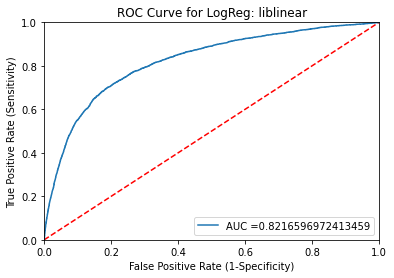

In [173]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [174]:

#____________________SMOTE 

novac = df[df.h1n1_vaccine == 0] #15128,26
vac = df[df.h1n1_vaccine == 1] #4514, 26

In [175]:
#__________________________________ oversample minority_with replacement
from sklearn.utils import resample
vac_oversample = resample(vac,
                          replace=True, # sample with replacement
                          n_samples=len(novac), # match number in majority class
                          random_state=27) # reproducible results


In [176]:
# combine majority and oversampled minority

dfsmote = pd.concat([novac, vac_oversample]) 
dfsmote.h1n1_vaccine.value_counts()

0    15128
1    15128
Name: h1n1_vaccine, dtype: int64

In [177]:
dfsmote.to_csv('hnsmote.csv')
#___________________lets re do log reg
# X and y
X2 = dfsmote.loc[:, dfsmote.columns != 'h1n1_vaccine']
y2 = dfsmote.loc[:, dfsmote.columns == 'h1n1_vaccine']
y2.value_counts() # both 15,128


h1n1_vaccine
0               15128
1               15128
dtype: int64

In [178]:
# solver = liblinear
'''
liblinear [library for linear classification]: good for small data
newton-cg [newton conjugate]: can be used in this case
lbfgs[limited memory BFGS]: for multiclass problems
BFGS:Broyden–Fletcher–Goldfarb–Shanno algorithm 
sag [Stochastic Average Gradient Descent]: good for large data sets
saga: a little variant of sag
'''
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression(solver='liblinear', random_state=0)
model2.fit(X2, y2)
model2.intercept_
model2.coef_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[-0.01118147,  0.2210547 ,  0.1371775 , -0.00679727,  0.14257456,
         0.09421023, -0.2000553 , -0.11595893, -0.01936165,  2.10424967,
        -0.63670885,  0.14104786,  0.19295641,  0.93630368,  0.43867647,
        -0.05666603,  0.22833308,  0.1551444 ,  0.23000128,  0.10607717,
        -0.11945159,  0.07376133,  0.04801412,  0.2681097 ,  0.24540743]])

In [179]:
#Predictions
y_pred2 = model2.predict(X2)

In [180]:
#Confusion matrix
from sklearn import metrics
cm2 = metrics.confusion_matrix(y2, y_pred2)
print(cm2)

[[11848  3280]
 [ 4154 10974]]


In [181]:
'''
WITH SMOTE=
[[11848  3280]
 [ 4154 10974]]

WITHOUT SMOTE = 
[[14200   928]
 [ 2608  1906]]
'''
#Accuracy Score - correct predictions / total number of data points
model2.score(X2,y2) #WITH SMOTE = 0.75; without = #.0.82
(11848+10974)/(11848+3200+4154+10974) # 0.75


0.756296394485684

In [182]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y2, y_pred2))

              precision    recall  f1-score   support

           0       0.74      0.78      0.76     15128
           1       0.77      0.73      0.75     15128

    accuracy                           0.75     30256
   macro avg       0.76      0.75      0.75     30256
weighted avg       0.76      0.75      0.75     30256



In [183]:
#ROC Curve - Receiver Operating Characteristic curve
#tpr = True Positive Rate 
#fpr = False Positive Rate
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_pred_prob2 = model2.predict_proba(X2)
fpr2, tpr2, thresholds2 =roc_curve(dfsmote["h1n1_vaccine"], y_pred_prob2[:,1])
roc_auc2 = auc(fpr2, tpr2) #Area under Curve 0.82
print(roc_auc2) # 0.82, same as without smote

0.8202646708776102


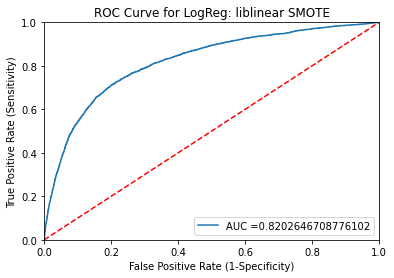

In [184]:
#ROC Curve
plt.title('ROC Curve for LogReg: liblinear SMOTE')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr2, tpr2, label = 'AUC =' +str(roc_auc2))
plt.legend(loc=4) #Location of label
plt.show()


In [1]:
#GLM Method
import os
os.chdir('C:\\Users\\Pallavi_P\\Desktop')
import pandas as pd 
pd.set_option('display.max_column',None)
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.utils import resample

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
import os

In [5]:
os.getcwd()

'C:\\Users\\Pallavi_P\\Desktop'

In [7]:
df=pd.read_csv(r'C:\Users\Pallavi_P\Desktop\WD_Python\hnsmote.csv')

In [8]:
df

,Unnamed: 0,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,dr_recc_seasonal_vacc,chronic_medic_condition,cont_child_undr_6_mnths,is_health_worker,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_risky,age_bracket,sex,income_level,marital_status,housing_status,h1n1_vaccine,race_1,race_2,race_3
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,4,0,1,1,0,0,0,0,1
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,2,1,1,1,1,0,0,0,1
2,2,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,5.0,4.0,5,0,1,1,1,0,0,0,1
3,3,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,3,0,2,0,0,0,0,0,1
4,4,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,4.0,5,1,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30251,18654,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0,2.0,4.0,1,1,3,1,0,1,0,0,1
30252,11916,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,5.0,2.0,5.0,5,0,2,1,0,1,0,0,1
30253,7137,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,4.0,3,0,2,1,0,1,0,0,1
30254,12817,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,1,1,3,1,0,1,0,0,1


In [10]:
df.info

<bound method DataFrame.info of        Unnamed: 0  h1n1_worry  h1n1_awareness  antiviral_medication  \
0               0         1.0             0.0                   0.0   
1               1         3.0             2.0                   0.0   
2               2         1.0             1.0                   0.0   
3               3         2.0             1.0                   0.0   
4               4         3.0             1.0                   0.0   
...           ...         ...             ...                   ...   
30251       18654         0.0             1.0                   0.0   
30252       11916         2.0             2.0                   0.0   
30253        7137         2.0             2.0                   0.0   
30254       12817         2.0             1.0                   0.0   
30255       16278         2.0             1.0                   0.0   

       contact_avoidance  bought_face_mask  wash_hands_frequently  \
0                    0.0               0.0    

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
model3=smf.glm(formula='''h1n1_vaccine~h1n1_worry+h1n1_awareness+ antiviral_medication+
       bought_face_mask+wash_hands_frequently+avoid_large_gatherings+
       reduced_outside_home_cont+ avoid_touch_face+dr_recc_h1n1_vacc+recc_seasonal_vacc+
       chronic_medic_condition+cont_child_undr_6_mnths+
       is_health_worker+ has_health_insur+is_h1n1_vacc_effective+
       is_h1n1_risky+sick_from_h1n1_vacc+is_seas_vacc_effective+
       is_seas_risky + sick_from_h1n1_vacc + is_seas_risky + age_bracket+sex+income_level+marital_status+housing_status+race_1+race_2+race3''',data=df,family=sm.families.Binomial())
result=model3.fit()
print(result.summary())

PatsyError: Error evaluating factor: NameError: name 'is_seas_vacc_effective' is not defined
    h1n1_vaccine~h1n1_worry+h1n1_awareness+ antiviral_medication+        bought_face_mask+wash_hands_frequently+avoid_large_gatherings+        reduced_outside_home_cont+ avoid_touch_face+dr_recc_h1n1_vacc+recc_seasonal_vacc+        chronic_medic_condition+cont_child_undr_6_mnths+        is_health_worker+ has_health_insur+is_h1n1_vacc_effective+        is_h1n1_risky+sick_from_h1n1_vacc+is_seas_vacc_effective+        is_seas_risky + sick_from_h1n1_vacc + is_seas_risky + age_bracket+sex+income_level+marital_status+housing_status+race_1+race_2+race3
                                                                                                                                                                                                                                                                                                                                                                                                    ^^^^^^^^^^^^^^^^^^^^^^